In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

luderitz na
portland au
khatanga ru
busselton au
rikitea pf
ambon id
pevek ru
mataura pf
castro cl
vaini to
puerto maldonado pe
punta arenas cl
beira mz
owen sound ca
castro cl
puerto ayora ec
gat ly
erechim br
puerto ayora ec
mys shmidta ru
deputatskiy ru
upernavik gl
mabaruma gy
lodja cd
husavik is
sentyabrskiy ru
srivardhan in
albany au
severo-kurilsk ru
yangjiang cn
kahului us
yellowknife ca
ribeira grande pt
cape town za
ushuaia ar
rikitea pf
ixtapa mx
victoria sc
kaeo nz
saldanha za
port alfred za
ancud cl
grindavik is
sentyabrskiy ru
samusu ws
cayenne gf
kapaa us
yulara au
lavrentiya ru
mahajanga mg
hithadhoo mv
jamestown sh
kedrovyy ru
halalo wf
tornio fi
hasaki jp
jamestown sh
puerto ayora ec
sakakah sa
port alfred za
naze jp
sentyabrskiy ru
belushya guba ru
rikitea pf
dikson ru
port alfred za
ancud cl
samusu ws
lensk ru
husavik is
esperance au
praia da vitoria pt
japura br
butaritari ki
puerto ayora ec
atuona pf
ushuaia ar
codrington ag
grand river south east mu
mataura pf
kl

port lincoln au
chuy uy
ushuaia ar
saint george bm
rio grande br
belushya guba ru
vaini to
ponta do sol cv
te anau nz
airai pw
hermanus za
ushuaia ar
clinton us
san cristobal ec
souillac mu
talnakh ru
mys shmidta ru
atuona pf
soyo ao
albany au
khasan ru
ushuaia ar
busselton au
castro cl
grindavik is
arraial do cabo br
quatre cocos mu
roald no
belushya guba ru
ribeira grande pt
beringovskiy ru
termiz uz
lebu cl
barrow us
taolanaro mg
miri my
bethel us
taolanaro mg
broken hill au
georgetown sh
kloulklubed pw
saint-philippe re
santa maria do suacui br
mataura pf
ushuaia ar
belushya guba ru
zaysan kz
half moon bay us
cape town za
jamestown sh
ushuaia ar
arraial do cabo br
rikitea pf
atuona pf
mataura pf
bhit shah pk
karachi pk
lata sb
samusu ws
tres arroyos ar
hobart au
hilo us
kavaratti in
mahebourg mu
yuzhno-yeniseyskiy ru
bethel us
kapaa us
fortuna us
ayan ru
punta arenas cl
avarua ck
labuhan id
hilo us
ust-omchug ru
mutis co
sinazongwe zm
chokurdakh ru
busselton au
saratoga springs us


In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=554d89c2ac4c2d57672a3edcf82f1110


In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ambon
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | puerto maldonado
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | beira
Processing Record 14 of Set 1 | owen sound
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | gat
Processing Record 17 of Set 1 | erechim
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | mabaruma
Processing Record 22 of Set 1 | lodja
Processing Record 23 of Set 1 | husavik
Processing Record 24 of Set 1 | sentya

Processing Record 40 of Set 4 | esmeraldas
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | caravelas
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | guadalajara
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | marsh harbour
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | port blair
Processing Record 1 of Set 5 | hobyo
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | uman
Processing Record 5 of Set 5 | dingli
Processing Record 6 of Set 5 | ucluelet
Processing Record 7 of Set 5 | staraya russa
Processing Record 8 of Set 5 | lucapa
Processing Record 9 of Set 5 | teul
City not found. Skipping...
Processing Record 10 of Set 5 | bela vista
Processing Record 11 of Set 5 | ahipara
Processing Record 12 of Set 5 | pisco
Processing Record 13 of Set 5 | palu
Pr

Processing Record 32 of Set 8 | bahir dar
Processing Record 33 of Set 8 | kemin
Processing Record 34 of Set 8 | moissala
Processing Record 35 of Set 8 | saint anthony
Processing Record 36 of Set 8 | cutro
Processing Record 37 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 8 | bonavista
Processing Record 39 of Set 8 | elat
Processing Record 40 of Set 8 | port lincoln
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | clinton
Processing Record 43 of Set 8 | san cristobal
Processing Record 44 of Set 8 | soyo
Processing Record 45 of Set 8 | khasan
Processing Record 46 of Set 8 | quatre cocos
Processing Record 47 of Set 8 | roald
Processing Record 48 of Set 8 | termiz
Processing Record 49 of Set 8 | miri
Processing Record 50 of Set 8 | kloulklubed
Processing Record 1 of Set 9 | santa maria do suacui
Processing Record 2 of Set 9 | zaysan
Processing Record 3 of Set 9 | half moon bay
Processing Record 4 of Set 9 | bhit shah
Processing R

Processing Record 23 of Set 12 | santa cruz del sur
Processing Record 24 of Set 12 | seondha
Processing Record 25 of Set 12 | aquiraz
Processing Record 26 of Set 12 | pudozh
Processing Record 27 of Set 12 | moose factory
Processing Record 28 of Set 12 | panapakkam
City not found. Skipping...
Processing Record 29 of Set 12 | burnie
Processing Record 30 of Set 12 | vestmannaeyjar
Processing Record 31 of Set 12 | medina
Processing Record 32 of Set 12 | peniche
Processing Record 33 of Set 12 | barguzin
Processing Record 34 of Set 12 | linares
Processing Record 35 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 12 | olinda
Processing Record 37 of Set 12 | punta alta
Processing Record 38 of Set 12 | qaqortoq
Processing Record 39 of Set 12 | alugan
Processing Record 40 of Set 12 | boyolangu
Processing Record 41 of Set 12 | grand gaube
Processing Record 42 of Set 12 | nokaneng
Processing Record 43 of Set 12 | daxian
City not found. Skipping...
Processing Record 44 o

In [23]:
len(city_data)

579

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.65,15.16,51.84,73,0,19.24,NA,2020-09-01 03:38:04
1,Portland,45.52,-122.68,70.00,63,55,6.06,US,2020-09-01 03:35:04
2,Khatanga,71.97,102.50,47.89,63,88,11.68,RU,2020-09-01 03:38:05
3,Busselton,-33.65,115.33,60.01,46,46,25.50,AU,2020-09-01 03:38:05
4,Rikitea,-23.12,-134.97,68.59,86,65,18.41,PF,2020-09-01 03:38:05
5,Ambon,-3.70,128.18,86.00,70,40,4.70,ID,2020-09-01 03:38:05
6,Pevek,69.70,170.31,37.26,89,97,11.77,RU,2020-09-01 03:38:06
7,Mataura,-46.19,168.86,45.00,72,60,11.01,NZ,2020-09-01 03:38:06
8,Castro,-24.79,-50.01,56.30,88,99,12.30,BR,2020-09-01 03:38:06
9,Vaini,-21.20,-175.20,80.60,83,75,10.29,TO,2020-09-01 03:38:07


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2020-09-01 03:38:04,-26.65,15.16,51.84,73,0,19.24
1,Portland,US,2020-09-01 03:35:04,45.52,-122.68,70.00,63,55,6.06
2,Khatanga,RU,2020-09-01 03:38:05,71.97,102.50,47.89,63,88,11.68
3,Busselton,AU,2020-09-01 03:38:05,-33.65,115.33,60.01,46,46,25.50
4,Rikitea,PF,2020-09-01 03:38:05,-23.12,-134.97,68.59,86,65,18.41
5,Ambon,ID,2020-09-01 03:38:05,-3.70,128.18,86.00,70,40,4.70
6,Pevek,RU,2020-09-01 03:38:06,69.70,170.31,37.26,89,97,11.77
7,Mataura,NZ,2020-09-01 03:38:06,-46.19,168.86,45.00,72,60,11.01
8,Castro,BR,2020-09-01 03:38:06,-24.79,-50.01,56.30,88,99,12.30
9,Vaini,TO,2020-09-01 03:38:07,-21.20,-175.20,80.60,83,75,10.29


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

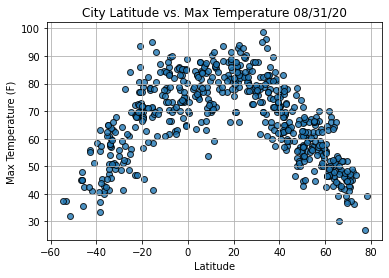

In [32]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()